# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data


* The data was retrieved from the [BioLINCC](https://biolincc.nhlbi.nih.gov/teaching/) website
* Data was obtained from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* Missing values in the dataset are indicated by a period (.)
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Variable Type|Levels (if applicable)/<br> Notes|
| --- | --- |---|---|
|RANDID | Unique identification number for each participant|NA||
|SEX | Participant sex|Categorical|1=Men <br> 2=Women|
|PERIOD|Examination Cycle|Categorical|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|AGE|Age at exam (years)|Continuous|
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|BPMEDS|Use of Anti-hypertensive medication at exam|Categorical|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|Categorical|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|Continuous|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)|Continuous|
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared|Continuous|
|GLUCOSE|Casual serum glucose (mg/dL)|Continuous|
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual glucose <br> of 200 mg/dL or more|Categorical|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|Continuous|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|Categorical|0=Free of disease <br> 1=Prevalent disease|
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral Hemorrhage, <br> or Subarachnoid Hemorrhage, <br> or Fatal Cerebrovascular Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [2]:
framingham = pd.read_csv('/Users/silviacatalina/Google Drive/BethelTech/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv', na_values=".")
pd.options.display.max_columns = None
framingham.head()

RANDID  SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  \
0    2448    1    195.0   39  106.0   70.0         0      0.0  26.97   
1    2448    1    209.0   52  121.0   66.0         0      0.0    NaN   
2    6238    2    250.0   46  121.0   81.0         0      0.0  28.73   
3    6238    2    260.0   52  105.0   69.5         0      0.0  29.43   
4    6238    2    237.0   58  108.0   66.0         0      0.0  28.50   

   DIABETES  BPMEDS  HEARTRTE  GLUCOSE  educ  PREVCHD  PREVAP  PREVMI  \
0         0     0.0      80.0     77.0   4.0        0       0       0   
1         0     0.0      69.0     92.0   4.0        0       0       0   
2         0     0.0      95.0     76.0   2.0        0       0       0   
3         0     0.0      80.0     86.0   2.0        0       0       0   
4         0     0.0      80.0     71.0   2.0        0       0       0   

   PREVSTRK  PREVHYP  TIME  PERIOD  HDLC   LDLC  DEATH  ANGINA  HOSPMI  \
0         0        0     0       1   NaN    NaN      0       0       1   
1         0        0  4628       3  31.0  178.0      0       0       1   
2         0        0     0       1   NaN    NaN      0       0       0   
3         0        0  2156       2   NaN    NaN      0       0       0   
4         0        0  4344       3  54.0  141.0      0       0       0   

   MI_FCHD  ANYCHD  STROKE  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  \
0        1       1       0    1         0    8766    6438      6438     6438   
1        1       1       0    1         0    8766    6438      6438     6438   
2        0       0       0    0         0    8766    8766      8766     8766   
3        0       0       0    0         0    8766    8766      8766     8766   
4        0       0       0    0         0    8766    8766      8766     8766   

   TIMESTRK  TIMECVD  TIMEDTH  TIMEHYP  
0      8766     6438     8766     8766  
1      8766     6438     8766     8766  
2      8766     8766     8766     8766  
3      8766     8766     8766     8766  
4      8766     8766     8766     8766

In [3]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

# Data Wrangling

## Selecting Columns of Interest

### List of original columns
RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,
PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,
TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP

In [4]:
framingham1 = framingham[['RANDID', 'SEX', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 
                          'CIGPDAY', 'TOTCHOL', 'HDLC', 'LDLC', 'BMI', 'GLUCOSE', 'DIABETES', 'HEARTRTE', 
                          'PREVHYP', 'ANYCHD', 'STROKE', 'DEATH']]
framingham1.head()

RANDID  SEX  PERIOD  AGE  SYSBP  DIABP  BPMEDS  CURSMOKE  CIGPDAY  TOTCHOL  \
0    2448    1       1   39  106.0   70.0     0.0         0      0.0    195.0   
1    2448    1       3   52  121.0   66.0     0.0         0      0.0    209.0   
2    6238    2       1   46  121.0   81.0     0.0         0      0.0    250.0   
3    6238    2       2   52  105.0   69.5     0.0         0      0.0    260.0   
4    6238    2       3   58  108.0   66.0     0.0         0      0.0    237.0   

   HDLC   LDLC    BMI  GLUCOSE  DIABETES  HEARTRTE  PREVHYP  ANYCHD  STROKE  \
0   NaN    NaN  26.97     77.0         0      80.0        0       1       0   
1  31.0  178.0    NaN     92.0         0      69.0        0       1       0   
2   NaN    NaN  28.73     76.0         0      95.0        0       0       0   
3   NaN    NaN  29.43     86.0         0      80.0        0       0       0   
4  54.0  141.0  28.50     71.0         0      80.0        0       0       0   

   DEATH  
0      0  
1      0  
2      0  
3      0  
4      0

In [5]:
framingham1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   PERIOD    11627 non-null  int64  
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   BPMEDS    11034 non-null  float64
 7   CURSMOKE  11627 non-null  int64  
 8   CIGPDAY   11548 non-null  float64
 9   TOTCHOL   11218 non-null  float64
 10  HDLC      3027 non-null   float64
 11  LDLC      3026 non-null   float64
 12  BMI       11575 non-null  float64
 13  GLUCOSE   10187 non-null  float64
 14  DIABETES  11627 non-null  int64  
 15  HEARTRTE  11621 non-null  float64
 16  PREVHYP   11627 non-null  int64  
 17  ANYCHD    11627 non-null  int64  
 18  STROKE    11627 non-null  int64  
 19  DEATH     11627 non-null  int64  
dtypes: float64(10), int64(10)
me

### Subset data to periods 1, 2, 3; Remove NAs; Reset indexes
* Variables removed: PERIOD, and HDLC, LDLC for periods 1 and 2

In [6]:
framinghamP1 = framingham1[framingham1['PERIOD'] == 1].copy()
framinghamP1.head()

RANDID  SEX  PERIOD  AGE  SYSBP  DIABP  BPMEDS  CURSMOKE  CIGPDAY  TOTCHOL  \
0    2448    1       1   39  106.0   70.0     0.0         0      0.0    195.0   
2    6238    2       1   46  121.0   81.0     0.0         0      0.0    250.0   
5    9428    1       1   48  127.5   80.0     0.0         1     20.0    245.0   
7   10552    2       1   61  150.0   95.0     0.0         1     30.0    225.0   
9   11252    2       1   46  130.0   84.0     0.0         1     23.0    285.0   

   HDLC  LDLC    BMI  GLUCOSE  DIABETES  HEARTRTE  PREVHYP  ANYCHD  STROKE  \
0   NaN   NaN  26.97     77.0         0      80.0        0       1       0   
2   NaN   NaN  28.73     76.0         0      95.0        0       0       0   
5   NaN   NaN  25.34     70.0         0      75.0        0       0       0   
7   NaN   NaN  28.58    103.0         0      65.0        1       0       1   
9   NaN   NaN  23.10     85.0         0      85.0        0       0       0   

   DEATH  
0      0  
2      0  
5      0  
7      1  
9      0

In [7]:
framinghamP1.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP1.dropna(inplace=True)
framinghamP1.reset_index(drop=True, inplace = True)
framinghamP1.head()

RANDID  SEX  AGE  SYSBP  DIABP  BPMEDS  CURSMOKE  CIGPDAY  TOTCHOL    BMI  \
0    2448    1   39  106.0   70.0     0.0         0      0.0    195.0  26.97   
1    6238    2   46  121.0   81.0     0.0         0      0.0    250.0  28.73   
2    9428    1   48  127.5   80.0     0.0         1     20.0    245.0  25.34   
3   10552    2   61  150.0   95.0     0.0         1     30.0    225.0  28.58   
4   11252    2   46  130.0   84.0     0.0         1     23.0    285.0  23.10   

   GLUCOSE  DIABETES  HEARTRTE  PREVHYP  ANYCHD  STROKE  DEATH  
0     77.0         0      80.0        0       1       0      0  
1     76.0         0      95.0        0       0       0      0  
2     70.0         0      75.0        0       0       0      0  
3    103.0         0      65.0        1       0       1      1  
4     85.0         0      85.0        0       0       0      0

In [8]:
framinghamP2 = framingham1[framingham1['PERIOD'] == 2].copy()
framinghamP2.head()

RANDID  SEX  PERIOD  AGE  SYSBP  DIABP  BPMEDS  CURSMOKE  CIGPDAY  \
3     6238    2       2   52  105.0   69.5     0.0         0      0.0   
6     9428    1       2   54  141.0   89.0     0.0         1     30.0   
8    10552    2       2   67  183.0  109.0     0.0         1     20.0   
10   11252    2       2   51  109.0   77.0     0.0         1     30.0   
13   11263    2       2   49  177.0  102.0     1.0         0      0.0   

    TOTCHOL  HDLC  LDLC    BMI  GLUCOSE  DIABETES  HEARTRTE  PREVHYP  ANYCHD  \
3     260.0   NaN   NaN  29.43     86.0         0      80.0        0       0   
6     283.0   NaN   NaN  25.34     87.0         0      75.0        0       0   
8     232.0   NaN   NaN  30.18     89.0         0      60.0        1       0   
10    343.0   NaN   NaN  23.48     72.0         0      90.0        0       0   
13    230.0   NaN   NaN  31.36     86.0         0     120.0        1       1   

    STROKE  DEATH  
3        0      0  
6        0      0  
8        1      1  
10       0      0  
13       0      0

In [9]:
framinghamP2.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP2.dropna(inplace=True)
framinghamP2.reset_index(drop=True, inplace = True)
framinghamP2.head()

RANDID  SEX  AGE  SYSBP  DIABP  BPMEDS  CURSMOKE  CIGPDAY  TOTCHOL    BMI  \
0    6238    2   52  105.0   69.5     0.0         0      0.0    260.0  29.43   
1    9428    1   54  141.0   89.0     0.0         1     30.0    283.0  25.34   
2   10552    2   67  183.0  109.0     0.0         1     20.0    232.0  30.18   
3   11252    2   51  109.0   77.0     0.0         1     30.0    343.0  23.48   
4   11263    2   49  177.0  102.0     1.0         0      0.0    230.0  31.36   

   GLUCOSE  DIABETES  HEARTRTE  PREVHYP  ANYCHD  STROKE  DEATH  
0     86.0         0      80.0        0       0       0      0  
1     87.0         0      75.0        0       0       0      0  
2     89.0         0      60.0        1       0       1      1  
3     72.0         0      90.0        0       0       0      0  
4     86.0         0     120.0        1       1       0      0

In [10]:
framinghamP3 = framingham1[framingham1['PERIOD'] == 3].copy()
framinghamP3.head()

RANDID  SEX  PERIOD  AGE  SYSBP  DIABP  BPMEDS  CURSMOKE  CIGPDAY  \
1     2448    1       3   52  121.0   66.0     0.0         0      0.0   
4     6238    2       3   58  108.0   66.0     0.0         0      0.0   
11   11252    2       3   58  155.0   90.0     0.0         1     30.0   
14   11263    2       3   55  180.0  106.0     1.0         0      0.0   
19   12806    2       3   57  110.0   46.0     0.0         1     30.0   

    TOTCHOL  HDLC   LDLC    BMI  GLUCOSE  DIABETES  HEARTRTE  PREVHYP  ANYCHD  \
1     209.0  31.0  178.0    NaN     92.0         0      69.0        0       1   
4     237.0  54.0  141.0  28.50     71.0         0      80.0        0       0   
11      NaN   NaN    NaN  24.61      NaN         0      74.0        1       0   
14    220.0  46.0  135.0  31.17     81.0         1      86.0        1       1   
19    320.0  34.0  286.0  22.02     87.0         0      75.0        0       0   

    STROKE  DEATH  
1        0      0  
4        0      0  
11       0      0  
14       0      0  
19       0      0

In [11]:
framinghamP3.drop(['PERIOD'], axis=1, inplace=True)
framinghamP3.dropna(inplace=True)
framinghamP3.reset_index(drop=True, inplace = True)
framinghamP3.head()

RANDID  SEX  AGE  SYSBP  DIABP  BPMEDS  CURSMOKE  CIGPDAY  TOTCHOL  HDLC  \
0    6238    2   58  108.0   66.0     0.0         0      0.0    237.0  54.0   
1   11263    2   55  180.0  106.0     1.0         0      0.0    220.0  46.0   
2   12806    2   57  110.0   46.0     0.0         1     30.0    320.0  34.0   
3   14367    1   64  168.0  100.0     0.0         0      0.0    280.0  44.0   
4   16365    1   55  173.0  123.0     1.0         0      0.0    211.0  48.0   

    LDLC    BMI  GLUCOSE  DIABETES  HEARTRTE  PREVHYP  ANYCHD  STROKE  DEATH  
0  141.0  28.50     71.0         0      80.0        0       0       0      0  
1  135.0  31.17     81.0         1      86.0        1       1       0      0  
2  286.0  22.02     87.0         0      75.0        0       0       0      0  
3  236.0  25.72     82.0         0      92.0        1       0       0      0  
4  163.0  29.11     85.0         0      75.0        1       0       0      0

## Setting variables with whole numbers to integers

In [12]:
framinghamP1.BPMEDS = framinghamP1.BPMEDS.astype(int)
framinghamP1.CIGPDAY = framinghamP1.CIGPDAY.astype(int)
framinghamP1.TOTCHOL = framinghamP1.TOTCHOL.astype(int)
framinghamP1.GLUCOSE = framinghamP1.GLUCOSE.astype(int)
framinghamP1.HEARTRTE = framinghamP1.HEARTRTE.astype(int)
framinghamP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3927 non-null   int64  
 1   SEX       3927 non-null   int64  
 2   AGE       3927 non-null   int64  
 3   SYSBP     3927 non-null   float64
 4   DIABP     3927 non-null   float64
 5   BPMEDS    3927 non-null   int64  
 6   CURSMOKE  3927 non-null   int64  
 7   CIGPDAY   3927 non-null   int64  
 8   TOTCHOL   3927 non-null   int64  
 9   BMI       3927 non-null   float64
 10  GLUCOSE   3927 non-null   int64  
 11  DIABETES  3927 non-null   int64  
 12  HEARTRTE  3927 non-null   int64  
 13  PREVHYP   3927 non-null   int64  
 14  ANYCHD    3927 non-null   int64  
 15  STROKE    3927 non-null   int64  
 16  DEATH     3927 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 521.7 KB


In [13]:
framinghamP2.BPMEDS = framinghamP2.BPMEDS.astype(int)
framinghamP2.CIGPDAY = framinghamP2.CIGPDAY.astype(int)
framinghamP2.TOTCHOL = framinghamP2.TOTCHOL.astype(int)
framinghamP2.GLUCOSE = framinghamP2.GLUCOSE.astype(int)
framinghamP2.HEARTRTE = framinghamP2.HEARTRTE.astype(int)
framinghamP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3309 non-null   int64  
 1   SEX       3309 non-null   int64  
 2   AGE       3309 non-null   int64  
 3   SYSBP     3309 non-null   float64
 4   DIABP     3309 non-null   float64
 5   BPMEDS    3309 non-null   int64  
 6   CURSMOKE  3309 non-null   int64  
 7   CIGPDAY   3309 non-null   int64  
 8   TOTCHOL   3309 non-null   int64  
 9   BMI       3309 non-null   float64
 10  GLUCOSE   3309 non-null   int64  
 11  DIABETES  3309 non-null   int64  
 12  HEARTRTE  3309 non-null   int64  
 13  PREVHYP   3309 non-null   int64  
 14  ANYCHD    3309 non-null   int64  
 15  STROKE    3309 non-null   int64  
 16  DEATH     3309 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 439.6 KB


In [14]:
framinghamP3.BPMEDS = framinghamP3.BPMEDS.astype(int)
framinghamP3.CIGPDAY = framinghamP3.CIGPDAY.astype(int)
framinghamP3.TOTCHOL = framinghamP3.TOTCHOL.astype(int)
framinghamP3.GLUCOSE = framinghamP3.GLUCOSE.astype(int)
framinghamP3.HEARTRTE = framinghamP3.HEARTRTE.astype(int)
framinghamP3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    2306 non-null   int64  
 1   SEX       2306 non-null   int64  
 2   AGE       2306 non-null   int64  
 3   SYSBP     2306 non-null   float64
 4   DIABP     2306 non-null   float64
 5   BPMEDS    2306 non-null   int64  
 6   CURSMOKE  2306 non-null   int64  
 7   CIGPDAY   2306 non-null   int64  
 8   TOTCHOL   2306 non-null   int64  
 9   HDLC      2306 non-null   float64
 10  LDLC      2306 non-null   float64
 11  BMI       2306 non-null   float64
 12  GLUCOSE   2306 non-null   int64  
 13  DIABETES  2306 non-null   int64  
 14  HEARTRTE  2306 non-null   int64  
 15  PREVHYP   2306 non-null   int64  
 16  ANYCHD    2306 non-null   int64  
 17  STROKE    2306 non-null   int64  
 18  DEATH     2306 non-null   int64  
dtypes: float64(5), int64(14)
memory usage: 342.4 KB


## Data Exploration

### Pairwise relationships of continuous variables

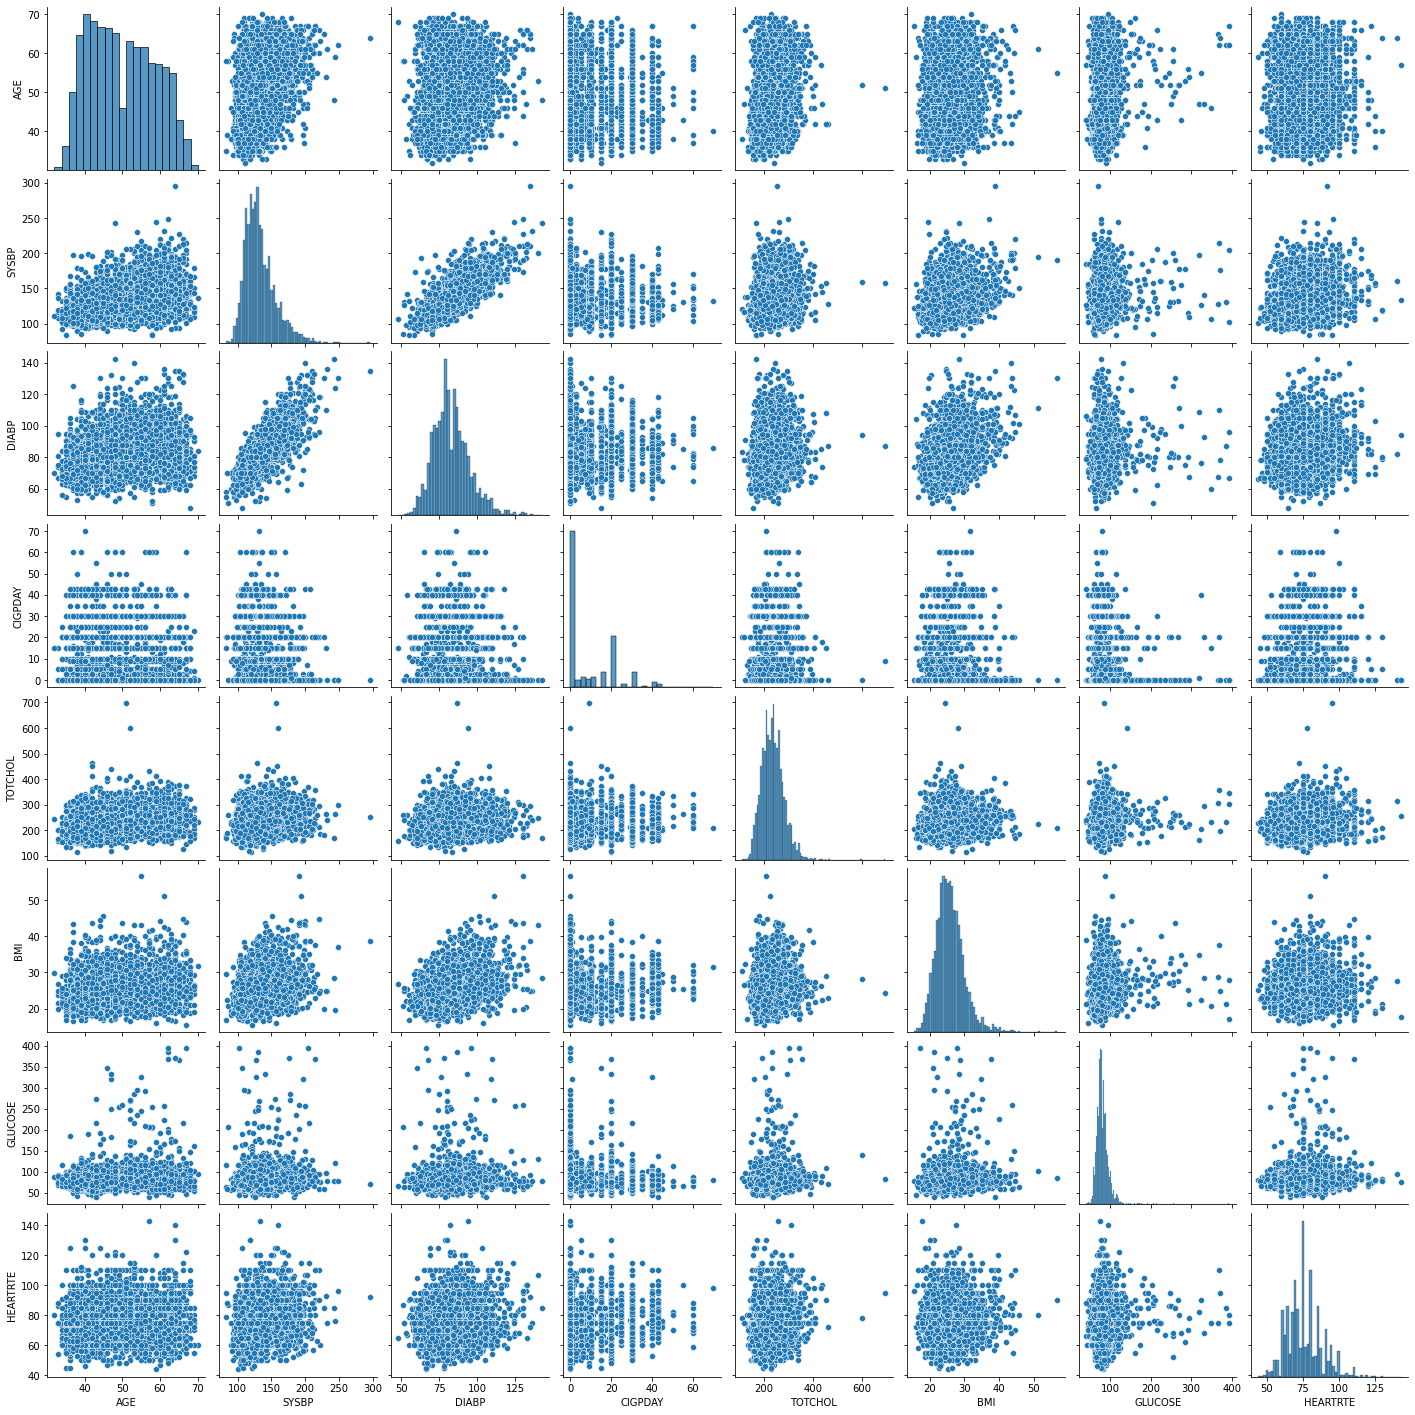

In [15]:
sns.pairplot(framinghamP1, vars =['AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE'])

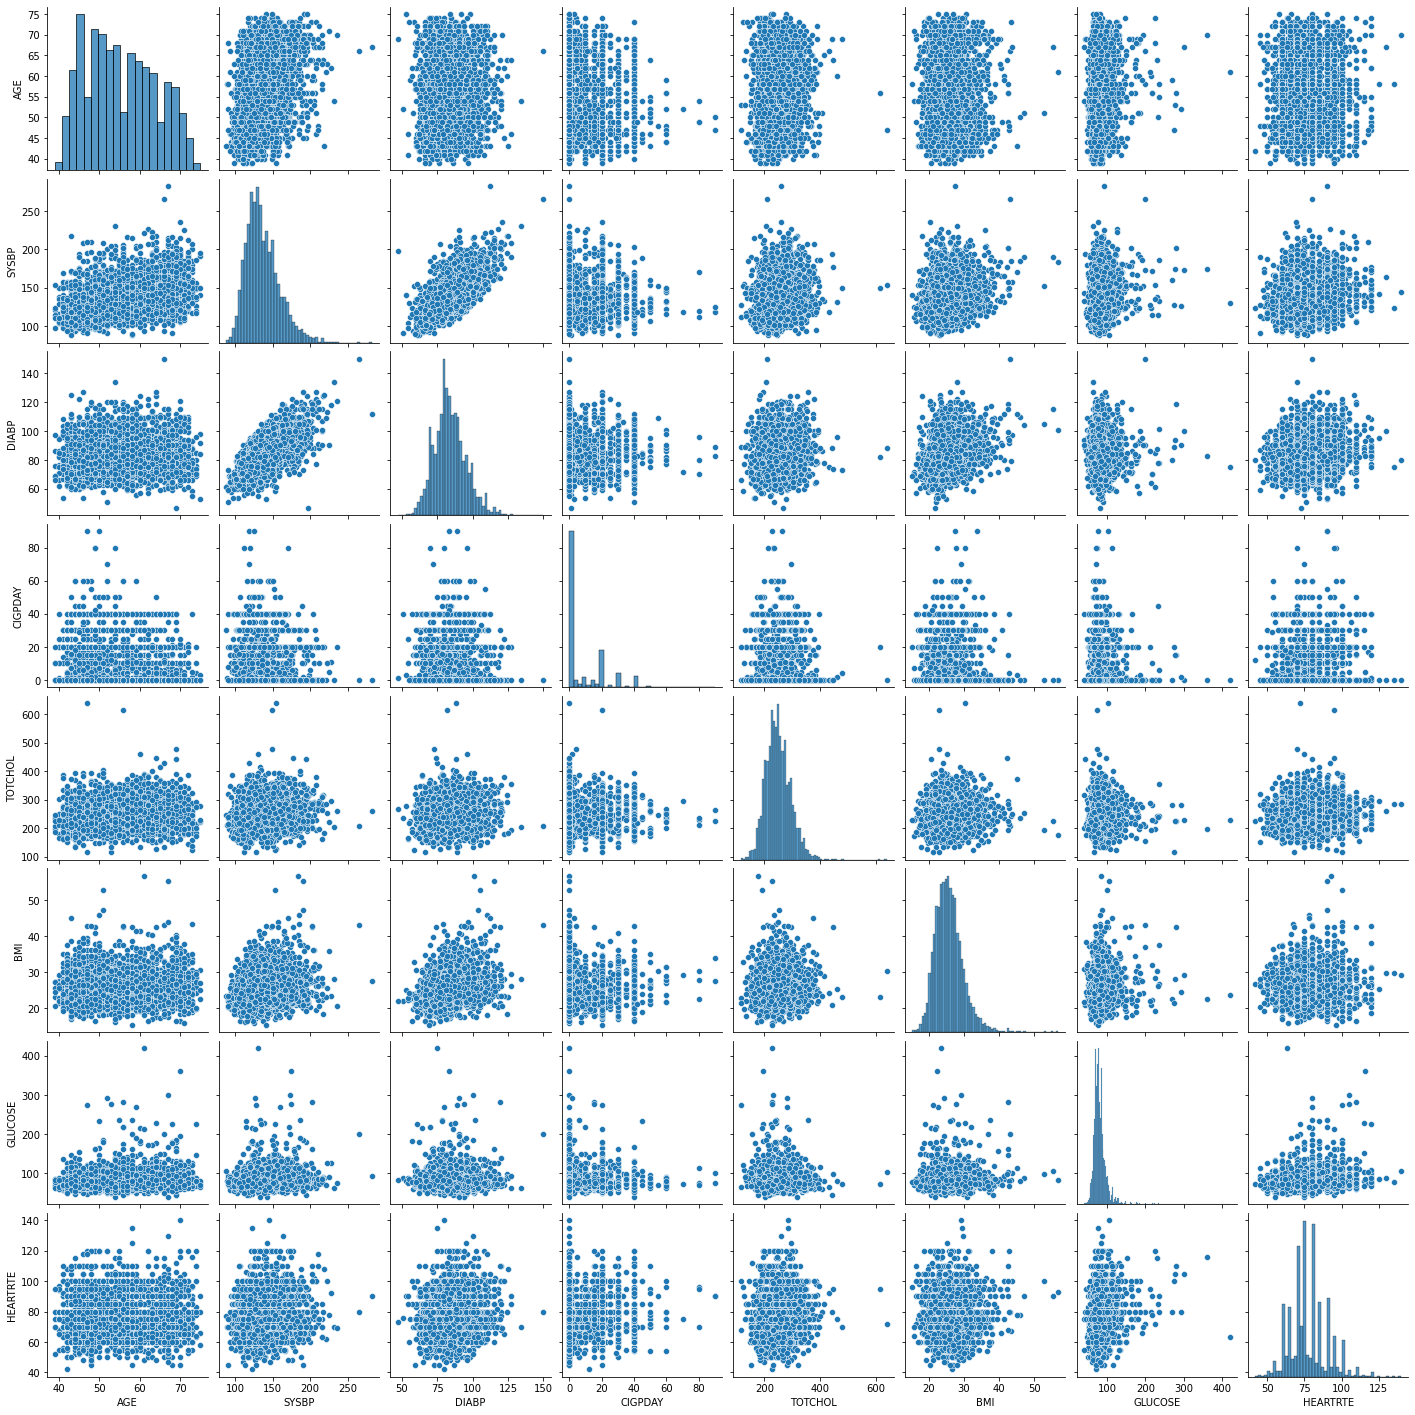

In [16]:
sns.pairplot(framinghamP2, vars =['AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE'])

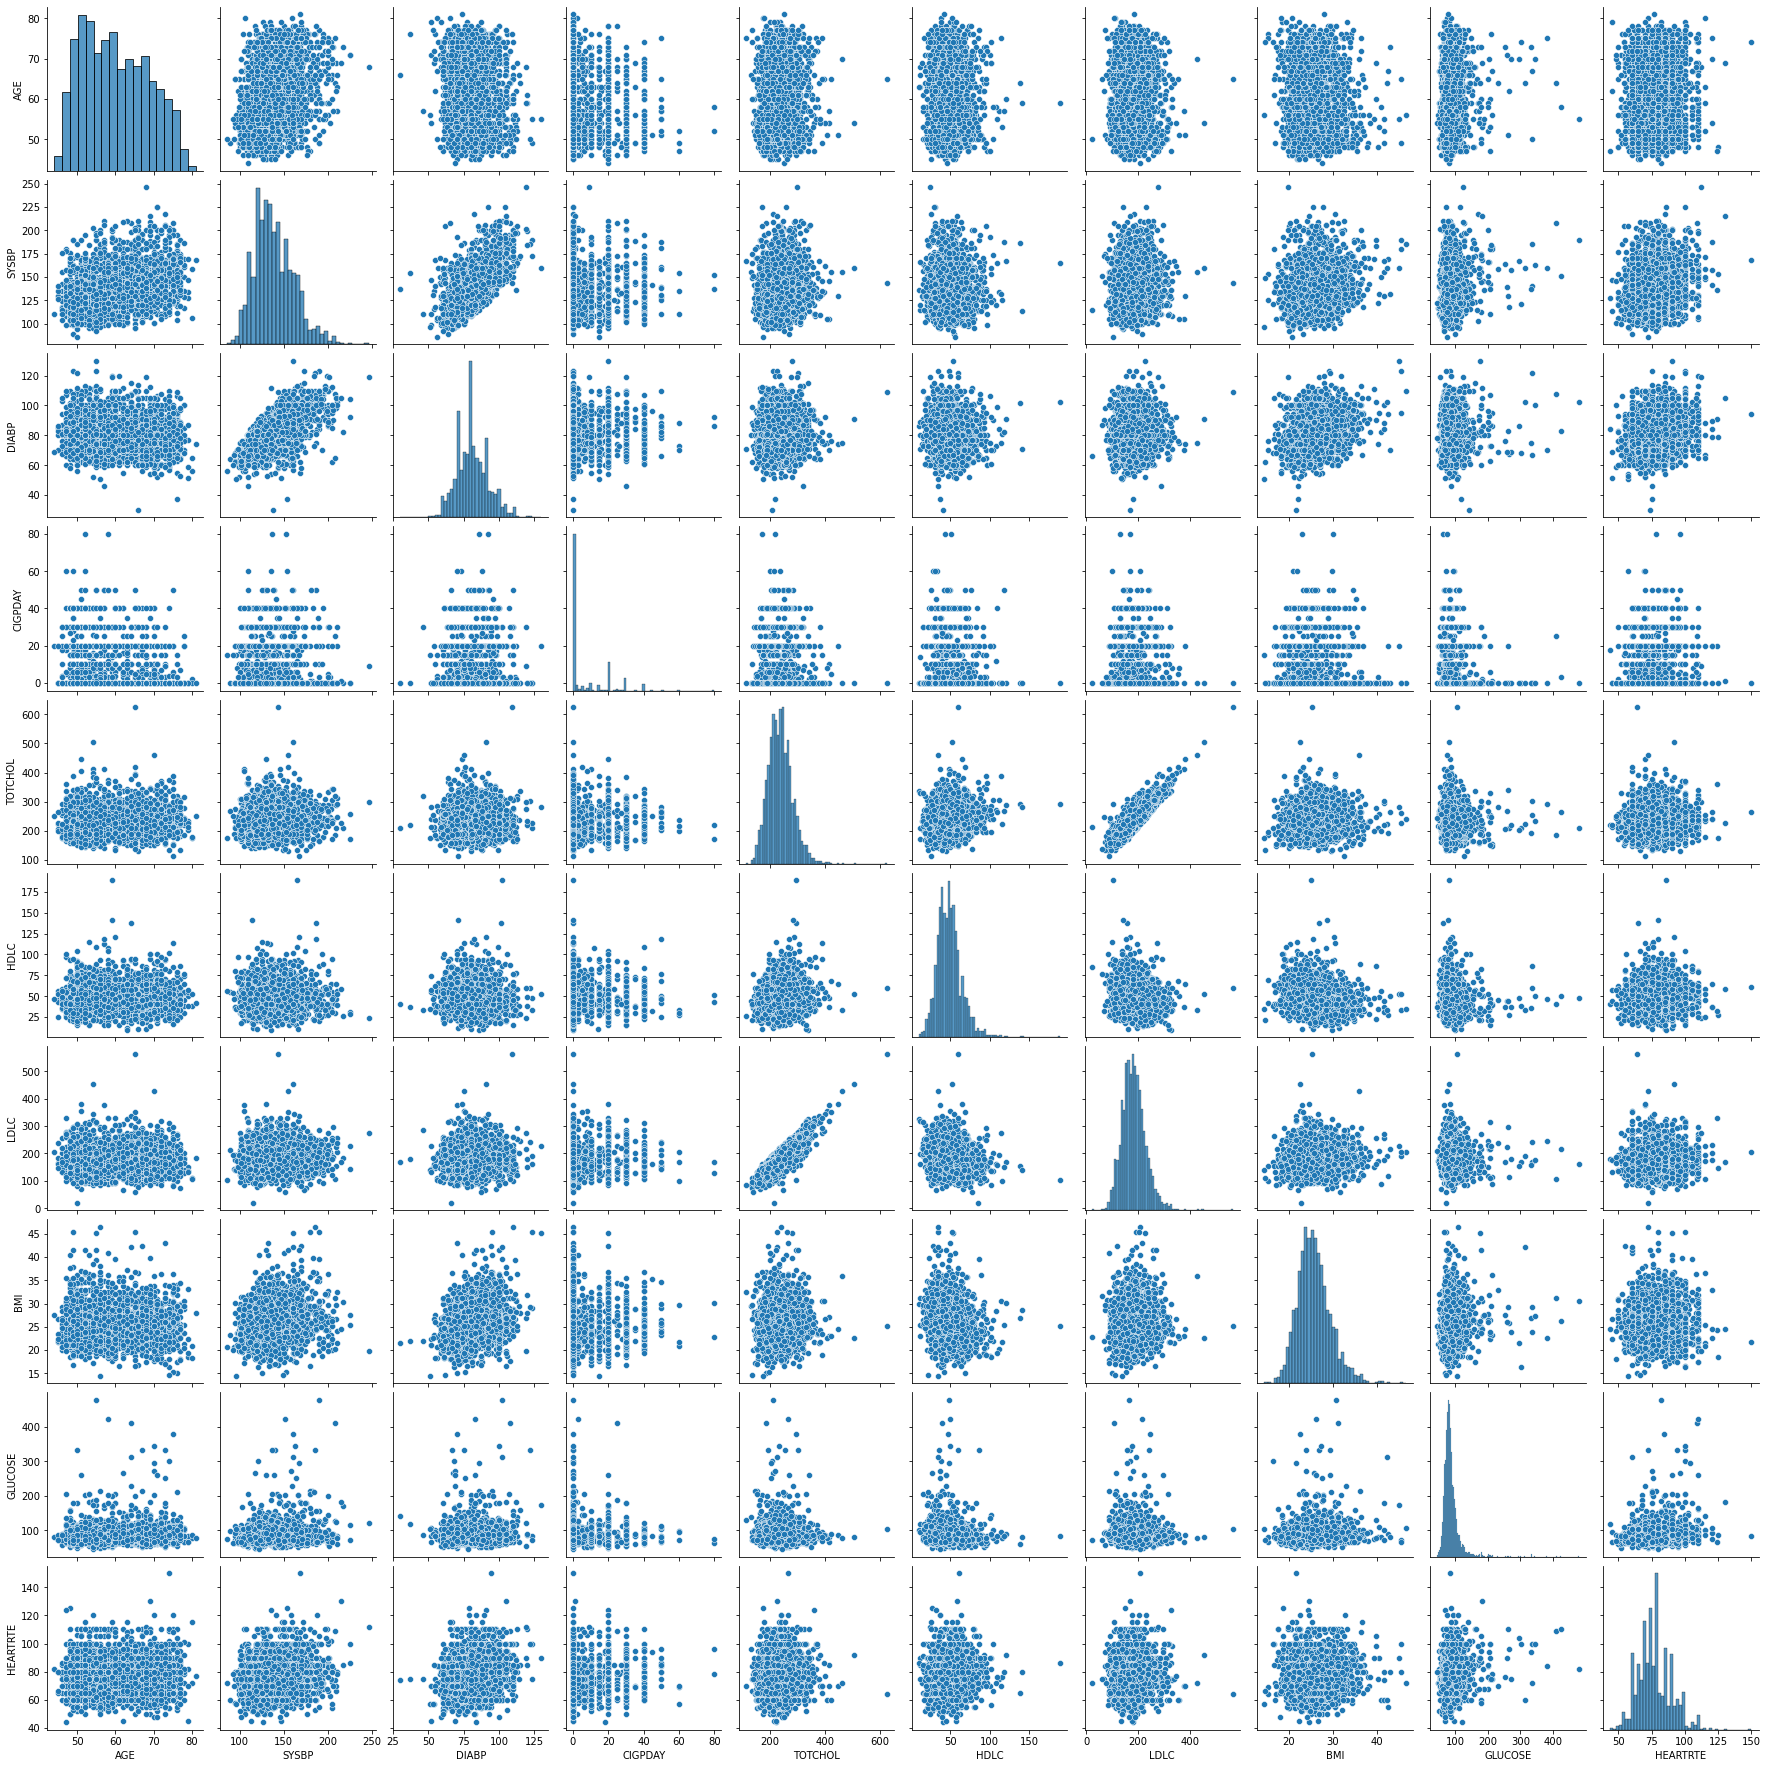

In [17]:
sns.pairplot(framinghamP3, vars =['AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'TOTCHOL', 'HDLC', 'LDLC', 'BMI', 'GLUCOSE', 'HEARTRTE'])

<AxesSubplot:>

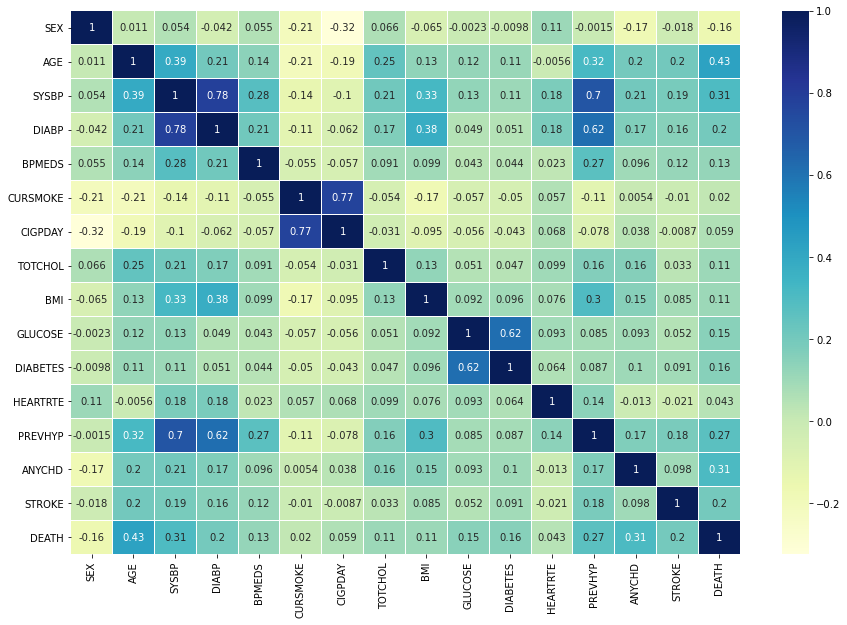

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(framinghamP1.drop('RANDID', axis =1).corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

<AxesSubplot:>

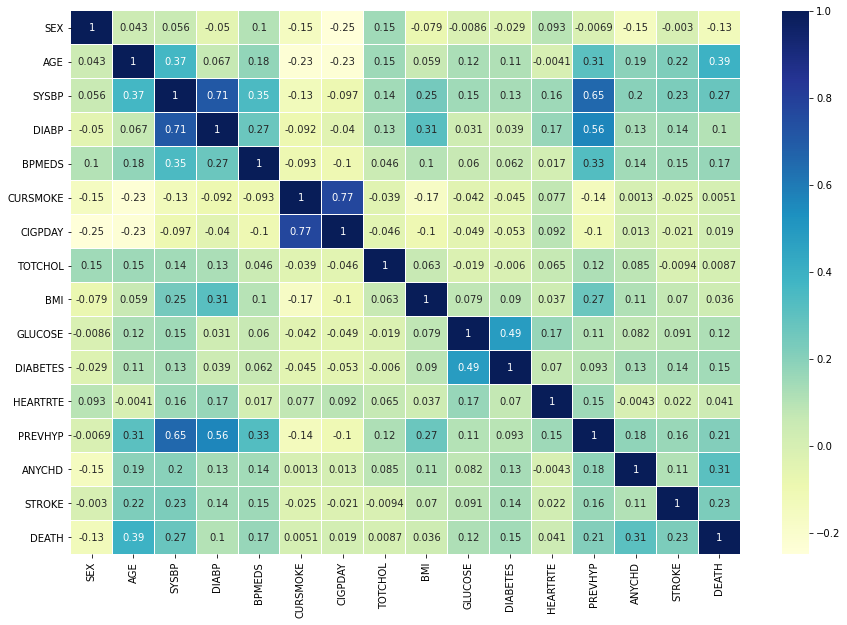

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(framinghamP2.drop('RANDID', axis =1).corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

<AxesSubplot:>

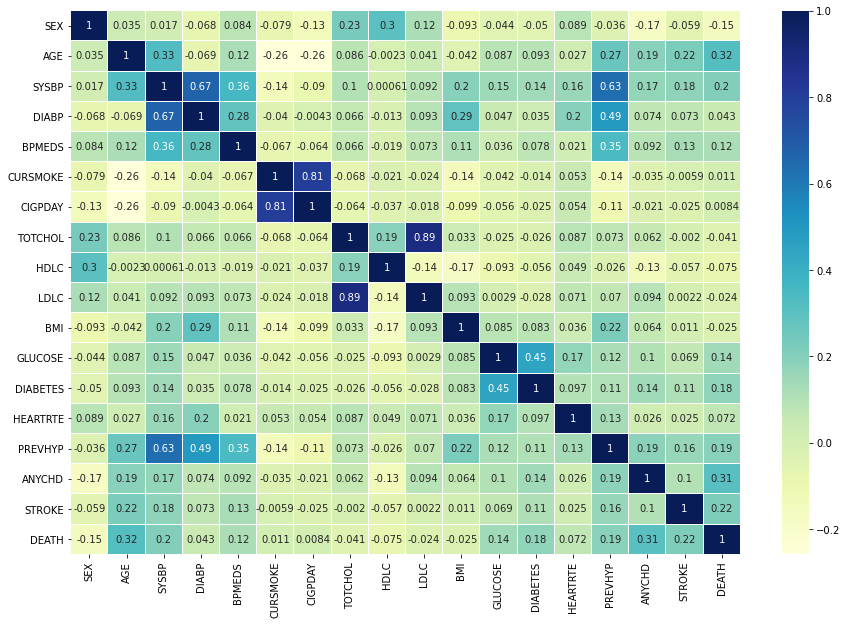

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(framinghamP3.drop('RANDID', axis =1).corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

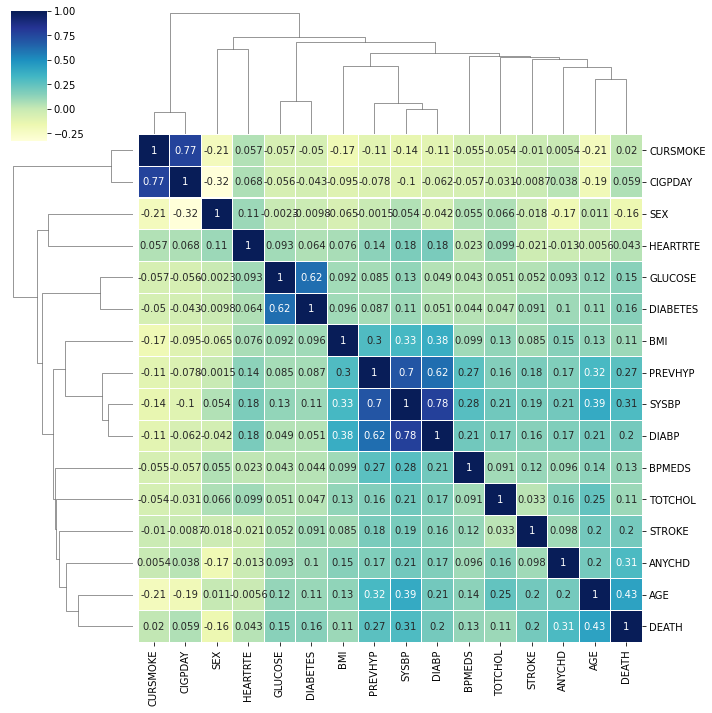

In [76]:
sns.clustermap(framinghamP1.drop('RANDID', axis =1).corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

<Figure size 1440x1152 with 0 Axes>

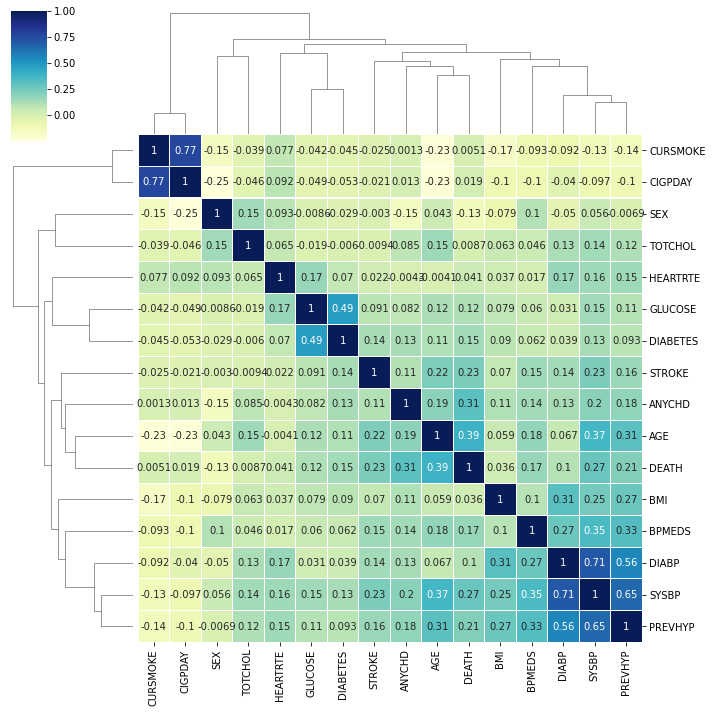

In [22]:
sns.clustermap(framinghamP2.drop('RANDID', axis =1).corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

<Figure size 1440x1152 with 0 Axes>

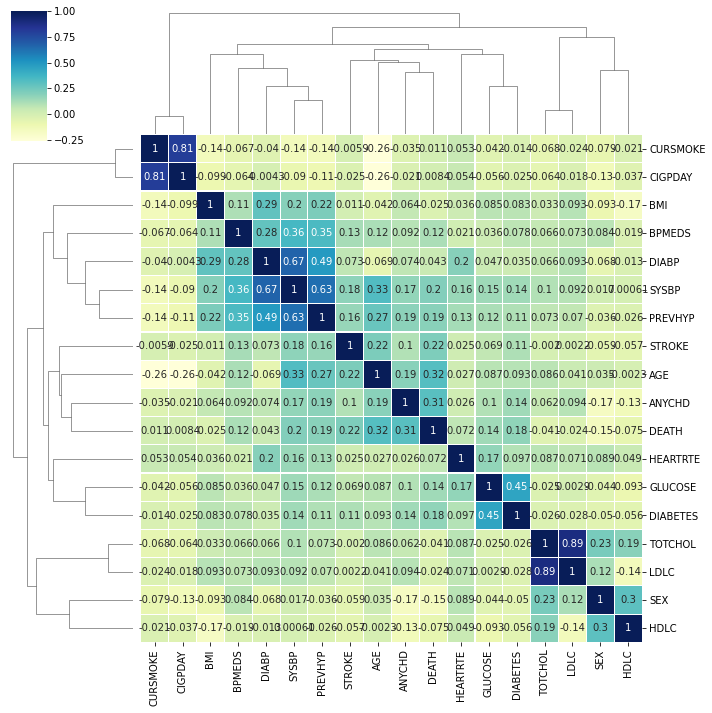

In [23]:
sns.clustermap(framinghamP3.drop('RANDID', axis =1).corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

<Figure size 1440x1152 with 0 Axes>

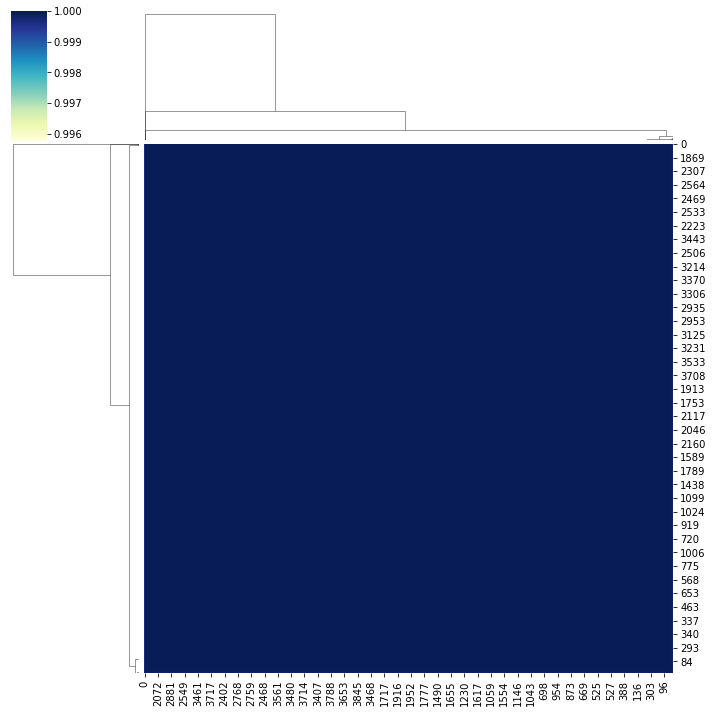

In [24]:
plt.figure(figsize=(20,16))
sns.clustermap(framinghamP1.T.corr(), cmap ="YlGnBu")

<Figure size 1440x1152 with 0 Axes>

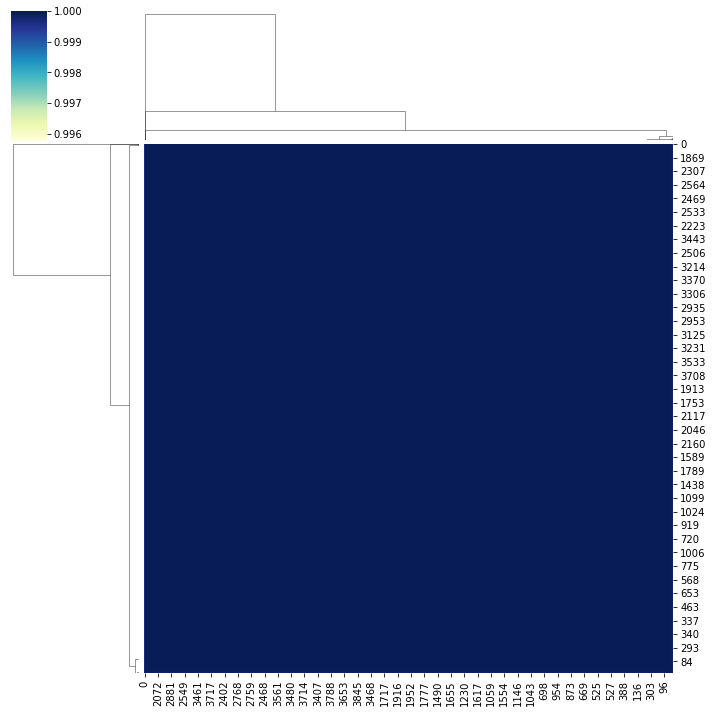

In [25]:
plt.figure(figsize=(20,16))
sns.clustermap(framinghamP1.T.corr(), cmap ="YlGnBu")

<Figure size 1440x1152 with 0 Axes>

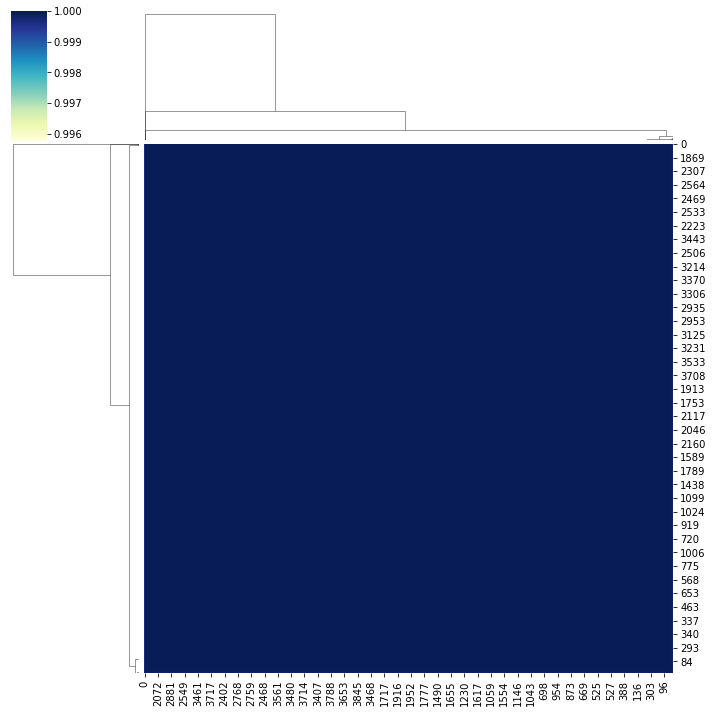

In [26]:
plt.figure(figsize=(20,16))
sns.clustermap(framinghamP1.T.corr(), cmap ="YlGnBu")

***The rows do not show noticeable grouping for all of the periods***

## Bar Charts (Categorical Variables)

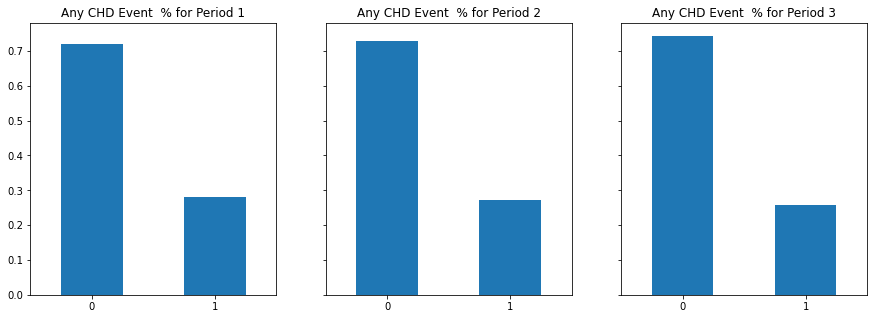

In [77]:
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
framinghamP1.ANYCHD.value_counts(normalize=True).plot.bar(title = 'Any CHD Event  % for Period 1', ax=axes[0])
framinghamP2.ANYCHD.value_counts(normalize=True).plot.bar(title = 'Any CHD Event  % for Period 2', ax=axes[1])
framinghamP3.ANYCHD.value_counts(normalize=True).plot.bar(title = 'Any CHD Event  % for Period 3', ax=axes[2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

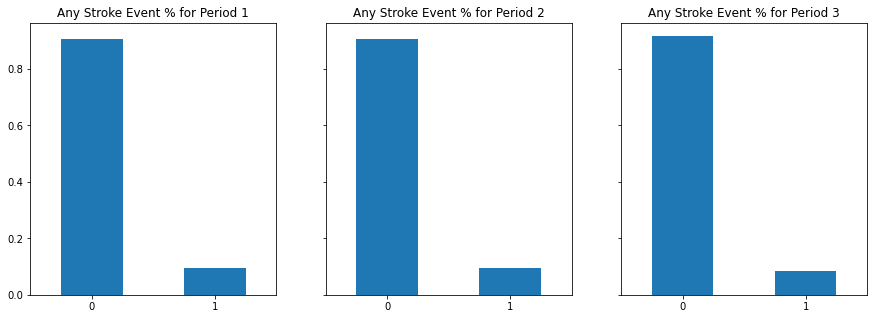

In [78]:
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
framinghamP1.STROKE.value_counts(normalize=True).plot.bar(title = 'Any Stroke Event % for Period 1', ax=axes[0])
framinghamP2.STROKE.value_counts(normalize=True).plot.bar(title = 'Any Stroke Event % for Period 2', ax=axes[1])
framinghamP3.STROKE.value_counts(normalize=True).plot.bar(title = 'Any Stroke Event % for Period 3', ax=axes[2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

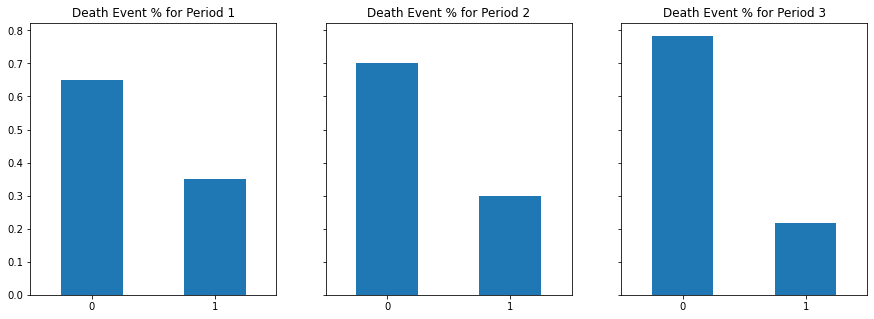

In [79]:
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
framinghamP1.DEATH.value_counts(normalize=True).plot.bar(title = 'Death Event % for Period 1', ax=axes[0])
framinghamP2.DEATH.value_counts(normalize=True).plot.bar(title = 'Death Event % for Period 2', ax=axes[1])
framinghamP3.DEATH.value_counts(normalize=True).plot.bar(title = 'Death Event % for Period 3', ax=axes[2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

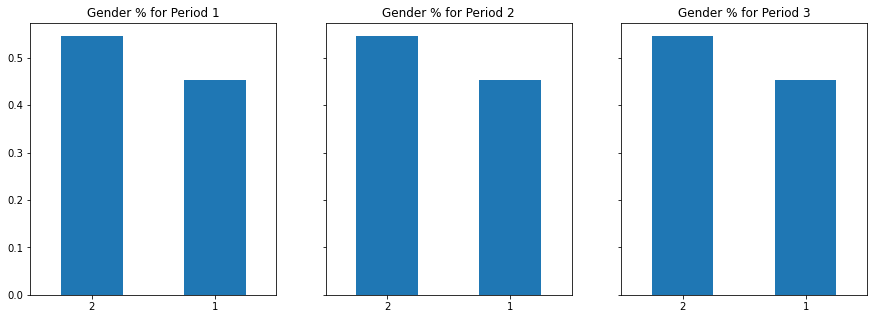

In [80]:
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
framinghamP1.SEX.value_counts(normalize=True).plot(kind = 'bar', title = 'Gender % for Period 1', ax=axes[0])
framinghamP1.SEX.value_counts(normalize=True).plot(kind = 'bar', title = 'Gender % for Period 2', ax=axes[1])
framinghamP1.SEX.value_counts(normalize=True).plot(kind = 'bar', title = 'Gender % for Period 3', ax=axes[2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

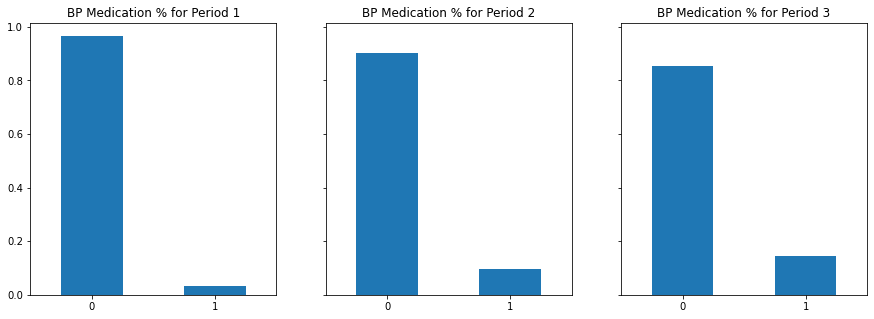

In [81]:
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
framinghamP1.BPMEDS.value_counts(normalize=True).plot.bar(title ='BP Medication % for Period 1', ax=axes[0])
framinghamP2.BPMEDS.value_counts(normalize=True).plot.bar(title ='BP Medication % for Period 2', ax=axes[1])
framinghamP3.BPMEDS.value_counts(normalize=True).plot.bar(title ='BP Medication % for Period 3', ax=axes[2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

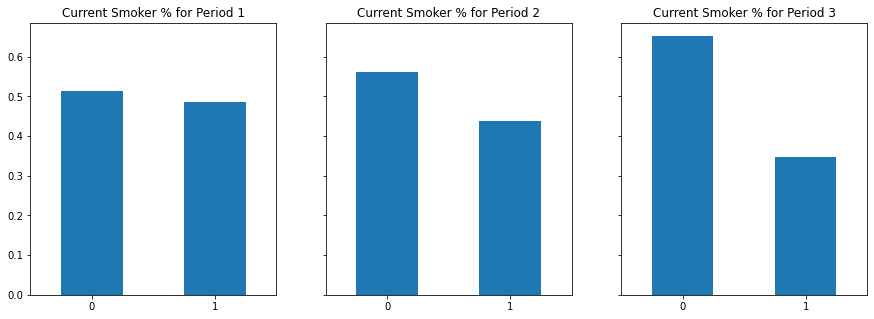

In [82]:
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
framinghamP1.CURSMOKE.value_counts(normalize=True).plot.bar(title = 'Current Smoker % for Period 1', ax=axes[0])
framinghamP2.CURSMOKE.value_counts(normalize=True).plot.bar(title = 'Current Smoker % for Period 2', ax=axes[1])
framinghamP3.CURSMOKE.value_counts(normalize=True).plot.bar(title = 'Current Smoker % for Period 3', ax=axes[2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

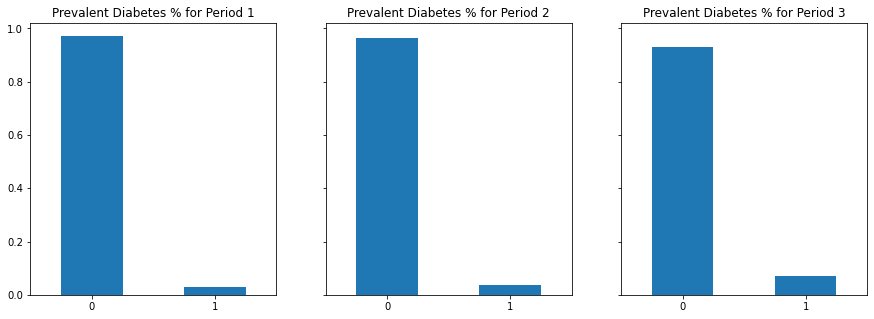

In [83]:
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
framinghamP1.DIABETES.value_counts(normalize=True).plot.bar(title = 'Prevalent Diabetes % for Period 1', ax=axes[0])
framinghamP2.DIABETES.value_counts(normalize=True).plot.bar(title = 'Prevalent Diabetes % for Period 2', ax=axes[1])
framinghamP3.DIABETES.value_counts(normalize=True).plot.bar(title = 'Prevalent Diabetes % for Period 3', ax=axes[2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

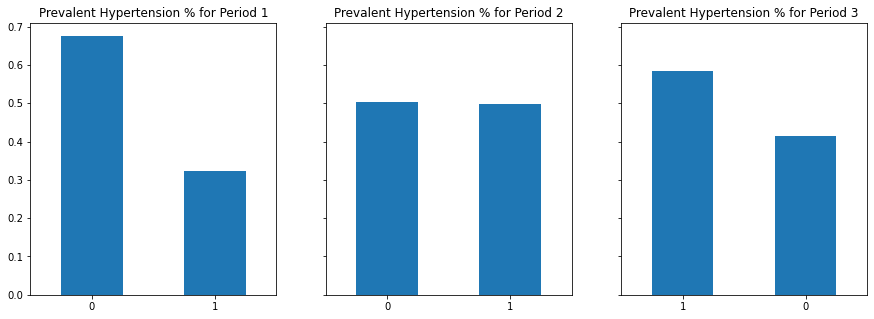

In [84]:
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
framinghamP1.PREVHYP.value_counts(normalize=True).plot.bar(title = 'Prevalent Hypertension % for Period 1', ax=axes[0])
framinghamP2.PREVHYP.value_counts(normalize=True).plot.bar(title = 'Prevalent Hypertension % for Period 2', ax=axes[1])
framinghamP3.PREVHYP.value_counts(normalize=True).plot.bar(title = 'Prevalent Hypertension % for Period 3', ax=axes[2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

## Histograms of Continuous Variables

[Text(0.5, 1.0, 'Age for Period 3')]

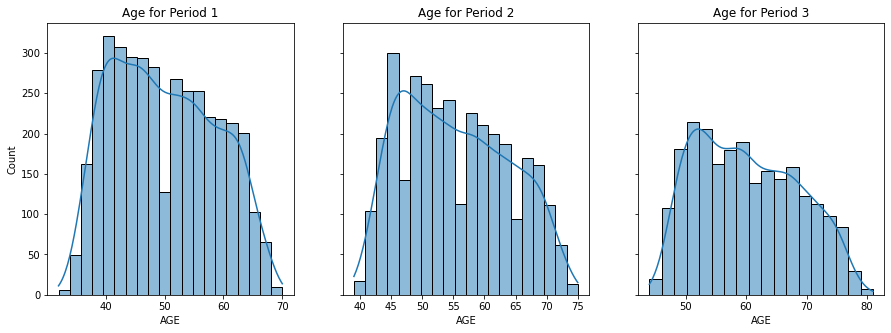

In [36]:
# 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE'
fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True)
sns.histplot(framinghamP1.AGE, kde = True, ax=axes[0]).set(title='Age for Period 1')
sns.histplot(framinghamP2.AGE, kde = True, ax=axes[1]).set(title='Age for Period 2')
sns.histplot(framinghamP3.AGE, kde = True, ax=axes[2]).set(title='Age for Period 3')

[Text(0.5, 1.0, 'Systolic Blood Pressure for Period 3')]

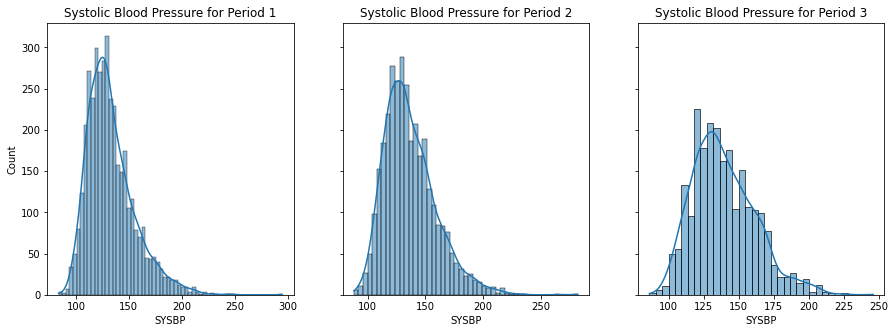

In [37]:
fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True)
sns.histplot(framinghamP1.SYSBP, kde = True, ax=axes[0]).set(title='Systolic Blood Pressure for Period 1')
sns.histplot(framinghamP2.SYSBP, kde = True, ax=axes[1]).set(title='Systolic Blood Pressure for Period 2')
sns.histplot(framinghamP3.SYSBP, kde = True, ax=axes[2]).set(title='Systolic Blood Pressure for Period 3')

[Text(0.5, 1.0, 'Diastolic Blood Pressure for Period 3')]

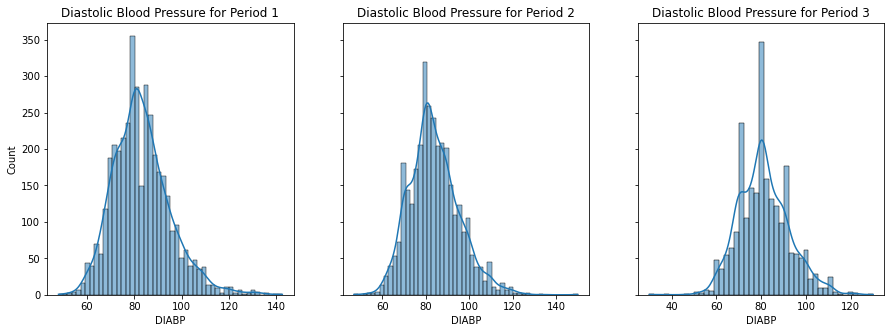

In [38]:
fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True)
sns.histplot(framinghamP1.DIABP,kde = True, ax=axes[0]).set(title='Diastolic Blood Pressure for Period 1')
sns.histplot(framinghamP2.DIABP,kde = True, ax=axes[1]).set(title='Diastolic Blood Pressure for Period 2')
sns.histplot(framinghamP3.DIABP,kde = True, ax=axes[2]).set(title='Diastolic Blood Pressure for Period 3')

[Text(0.5, 1.0, 'Cigarretes per Day for Period 3')]

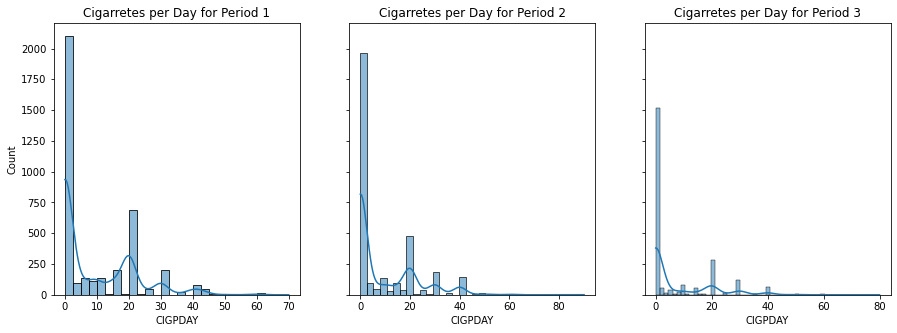

In [39]:
fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True)
sns.histplot(framinghamP1.CIGPDAY, kde = True, ax=axes[0]).set(title='Cigarretes per Day for Period 1')
sns.histplot(framinghamP2.CIGPDAY, kde = True, ax=axes[1]).set(title='Cigarretes per Day for Period 2')
sns.histplot(framinghamP3.CIGPDAY, kde = True, ax=axes[2]).set(title='Cigarretes per Day for Period 3')

[Text(0.5, 1.0, 'Total Cholesterol for Period 3')]

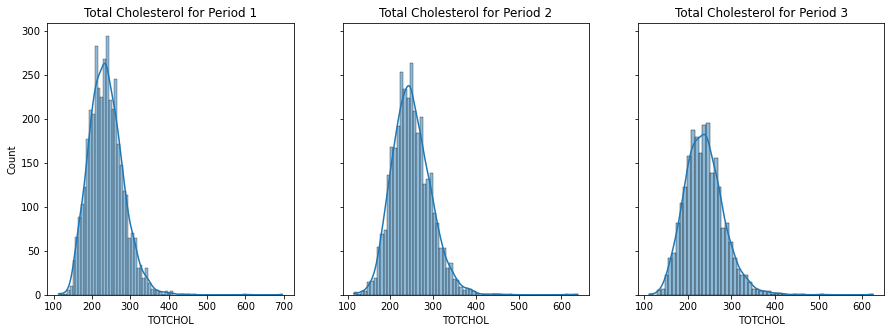

In [40]:
fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True)
sns.histplot(framinghamP1.TOTCHOL, kde = True, ax=axes[0]).set(title='Total Cholesterol for Period 1')
sns.histplot(framinghamP2.TOTCHOL, kde = True, ax=axes[1]).set(title='Total Cholesterol for Period 2')
sns.histplot(framinghamP3.TOTCHOL, kde = True, ax=axes[2]).set(title='Total Cholesterol for Period 3')

[Text(0.5, 1.0, 'BMI for Period 3')]

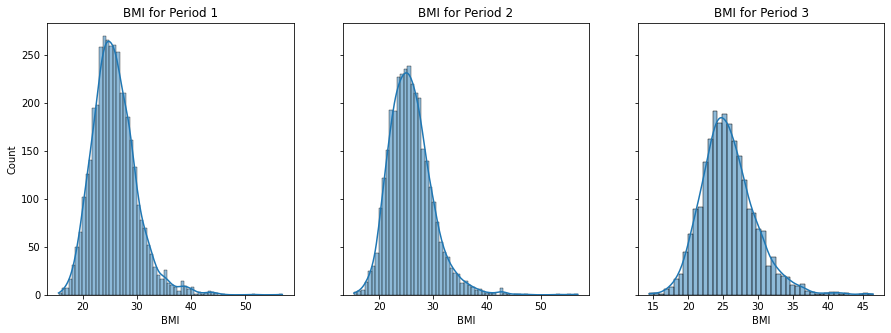

In [41]:
fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True)
sns.histplot(framinghamP1.BMI, kde = True, ax=axes[0]).set(title='BMI for Period 1')
sns.histplot(framinghamP2.BMI, kde = True, ax=axes[1]).set(title='BMI for Period 2')
sns.histplot(framinghamP3.BMI, kde = True, ax=axes[2]).set(title='BMI for Period 3')

[Text(0.5, 1.0, 'Glucose for Period 3')]

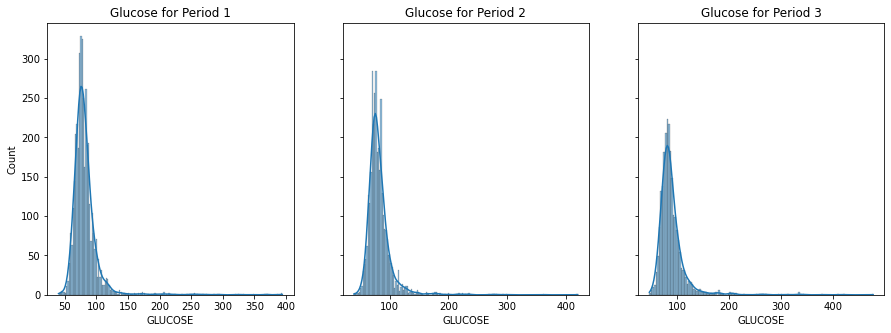

In [42]:
fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True)
sns.histplot(framinghamP1.GLUCOSE, kde = True, ax=axes[0]).set(title='Glucose for Period 1')
sns.histplot(framinghamP2.GLUCOSE, kde = True, ax=axes[1]).set(title='Glucose for Period 2')
sns.histplot(framinghamP3.GLUCOSE, kde = True, ax=axes[2]).set(title='Glucose for Period 3')

[Text(0.5, 1.0, 'Heart Rate for Period 3')]

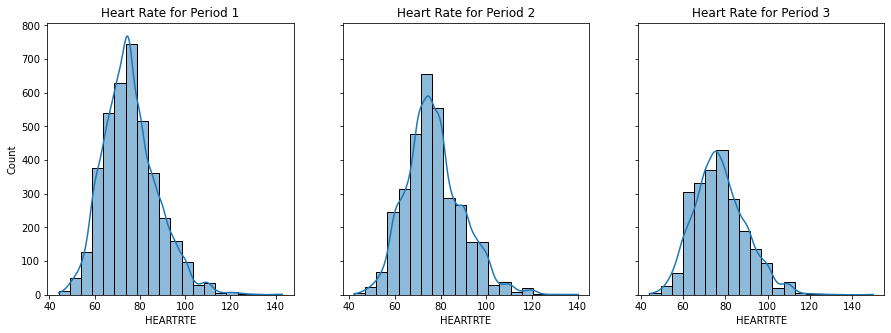

In [43]:
fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True)
sns.histplot(framinghamP1.HEARTRTE, bins = 20, kde = True, ax=axes[0]).set(title='Heart Rate for Period 1')
sns.histplot(framinghamP2.HEARTRTE, bins = 20, kde = True, ax=axes[1]).set(title='Heart Rate for Period 2')
sns.histplot(framinghamP3.HEARTRTE, bins = 20, kde = True, ax=axes[2]).set(title='Heart Rate for Period 3')

### 1. Systolic and Diastolic Blood Pressure (BP)
* Red vertical lines represent the thresholds for a dignosis of __stage 1 hypertension__, i.e. hypertension is diagnosed when an individual has a diastolic blood pressure of 90 or higher __or__ a systolic blood pressure of 130 or higher

<AxesSubplot:xlabel='SYSBP', ylabel='Count'>

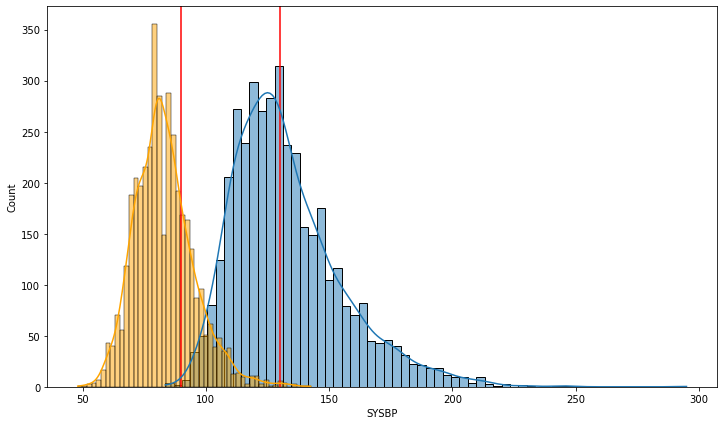

In [44]:
plt.figure(figsize = (12, 7))
plt.axvline(90, color ='red')
plt.axvline(130, color = 'red')
sns.histplot(framinghamP1.SYSBP, kde = True)
sns.histplot(framinghamP1.DIABP, kde = True, color ='orange')

<AxesSubplot:xlabel='SYSBP', ylabel='Count'>

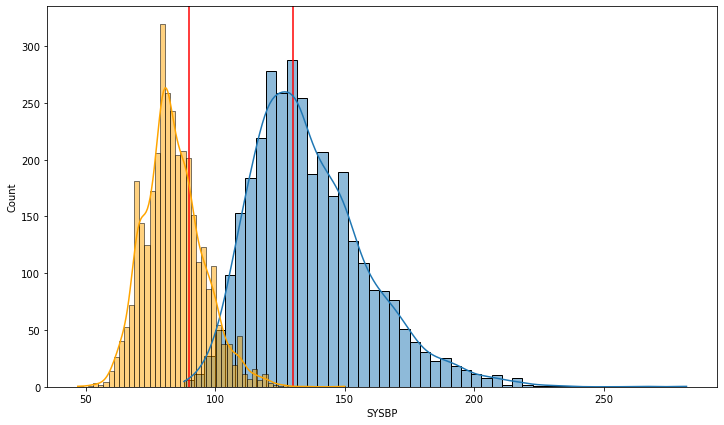

In [45]:
plt.figure(figsize = (12, 7))
plt.axvline(90, color ='red')
plt.axvline(130, color = 'red')
sns.histplot(framinghamP2.SYSBP, kde = True)
sns.histplot(framinghamP2.DIABP, kde = True, color ='orange')

<AxesSubplot:xlabel='SYSBP', ylabel='Count'>

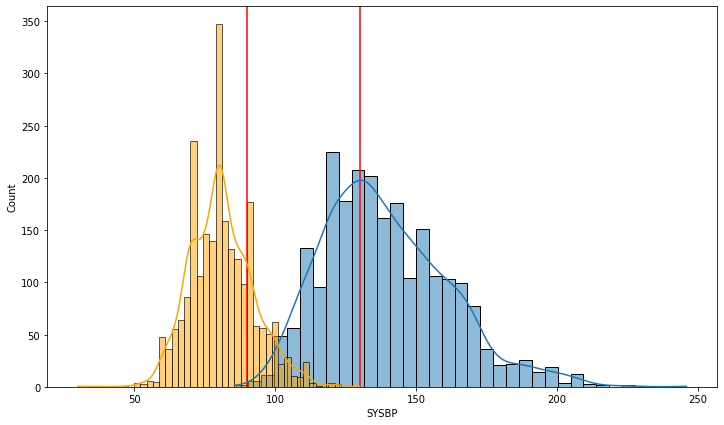

In [46]:
plt.figure(figsize = (12, 7))
plt.axvline(90, color ='red')
plt.axvline(130, color = 'red')
sns.histplot(framinghamP3.SYSBP, kde = True)
sns.histplot(framinghamP3.DIABP, kde = True, color ='orange')

### 2. Systolic Blood Pressure by Predictor Variables

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Coronary Heart Disease'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

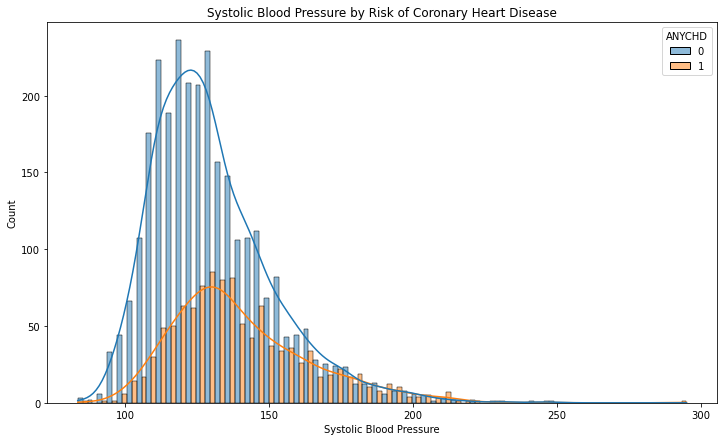

In [47]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Coronary Heart Disease')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP1, x = 'SYSBP', hue='ANYCHD', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Coronary Heart Disease'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

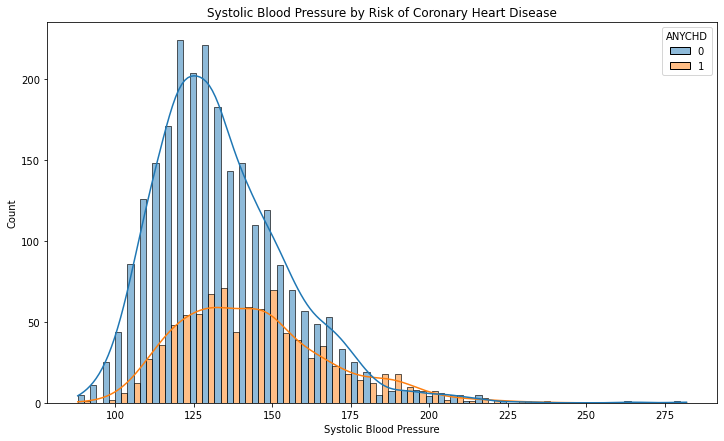

In [48]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Coronary Heart Disease')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP2, x = 'SYSBP', hue='ANYCHD', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Coronary Heart Disease'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

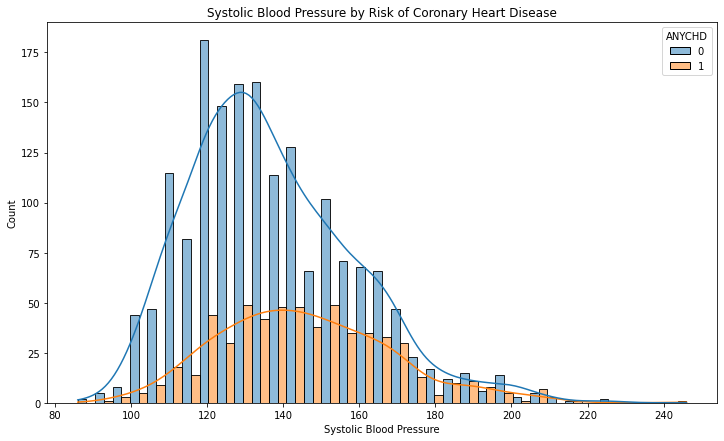

In [49]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Coronary Heart Disease')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP3, x = 'SYSBP', hue='ANYCHD', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Stroke'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

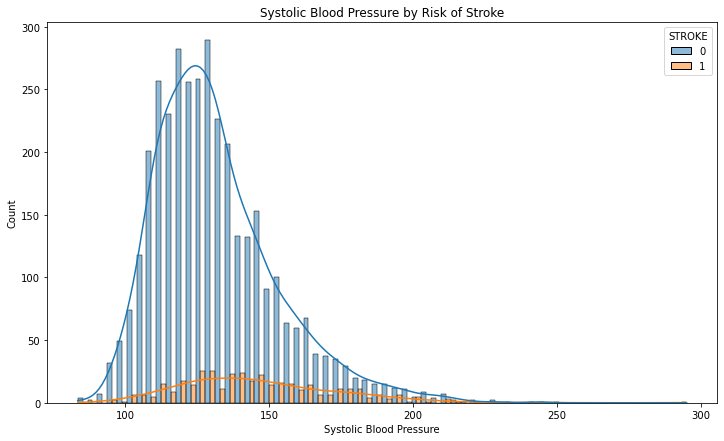

In [50]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Stroke')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP1, x = 'SYSBP', hue='STROKE', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Stroke'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

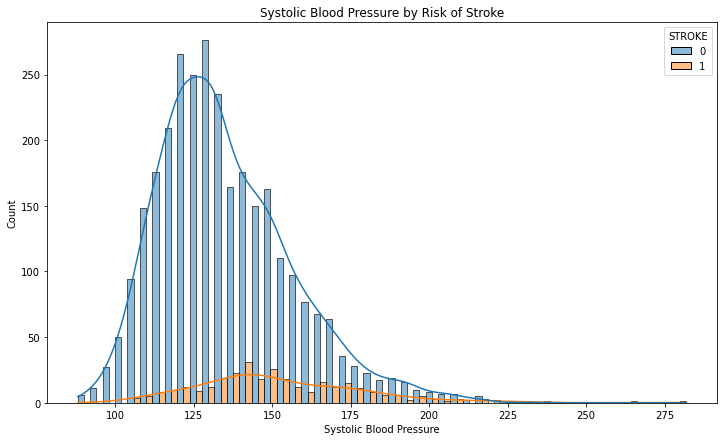

In [51]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Stroke')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP2, x = 'SYSBP', hue='STROKE', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Stroke'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

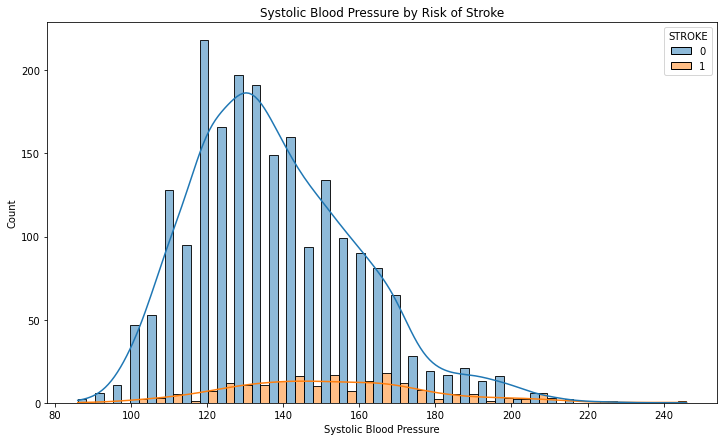

In [52]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Stroke')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP3, x = 'SYSBP', hue='STROKE', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Death'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

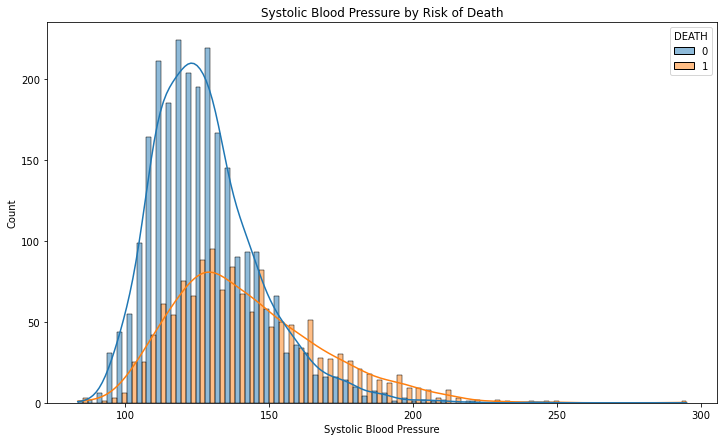

In [53]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Death')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP1, x = 'SYSBP', hue='DEATH', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Death'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

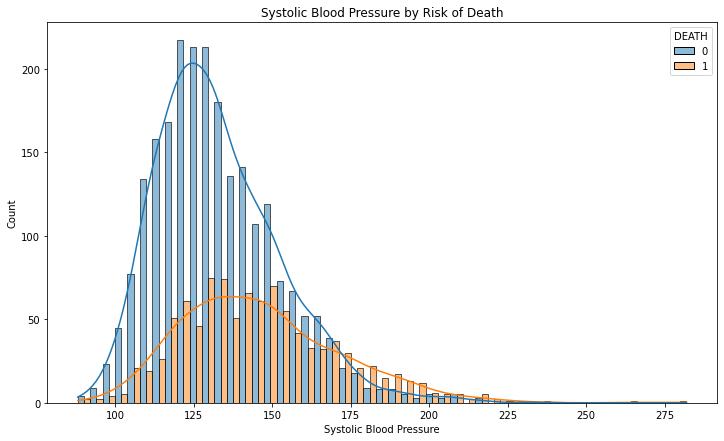

In [54]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Death')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP2, x = 'SYSBP', hue='DEATH', multiple= 'dodge', kde = True)

<AxesSubplot:title={'center':'Systolic Blood Pressure by Risk of Death'}, xlabel='Systolic Blood Pressure', ylabel='Count'>

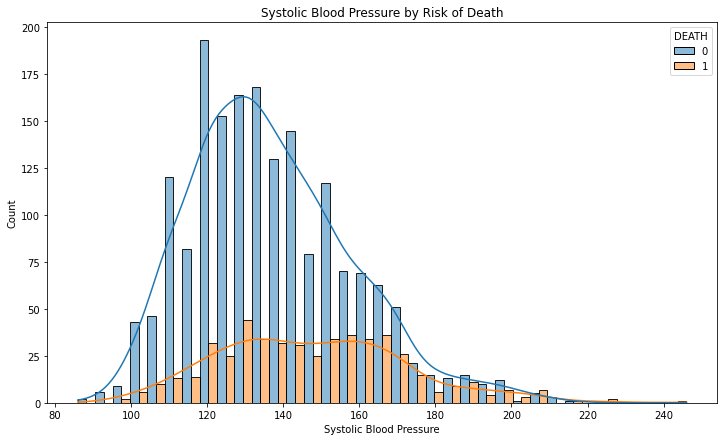

In [55]:
plt.figure(figsize = (12, 7))
plt.title('Systolic Blood Pressure by Risk of Death')
plt.xlabel('Systolic Blood Pressure')
sns.histplot(data = framinghamP3, x = 'SYSBP', hue='DEATH', multiple= 'dodge', kde = True)

### 3. Age

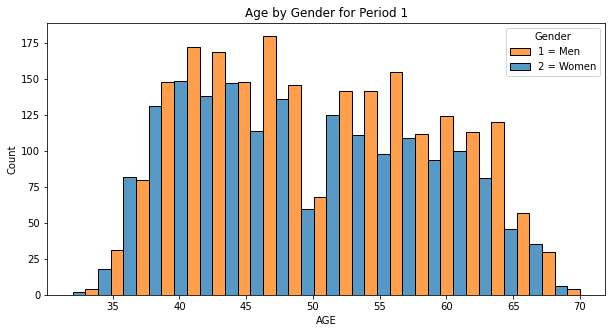

In [63]:
plt.figure(figsize = (10, 5))
plt.title('Age by Gender for Period 1')
sns.histplot(data = framinghamP1, x = 'AGE', hue='SEX', multiple='dodge', legend = False, palette="tab10")
plt.legend(title = "Gender", labels=['1 = Men', '2 = Women'])

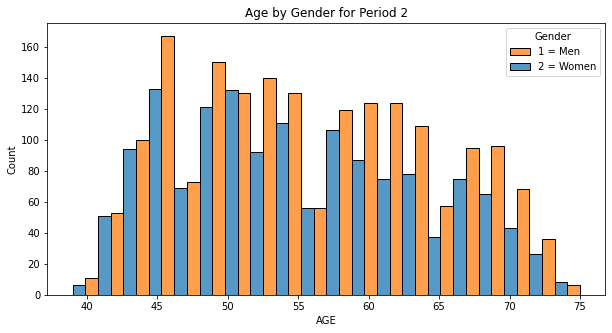

In [64]:
plt.figure(figsize = (10, 5))
plt.title('Age by Gender for Period 2')
sns.histplot(data = framinghamP2, x = 'AGE', hue='SEX', multiple='dodge', legend = False, palette="tab10")
plt.legend(title = "Gender", labels=['1 = Men', '2 = Women'])

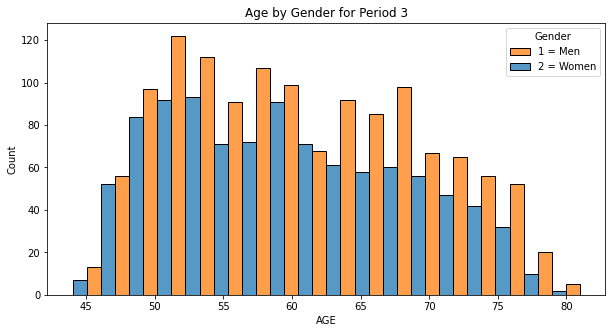

In [65]:
plt.figure(figsize = (10, 5))
plt.title('Age by Gender for Period 3')
sns.histplot(data = framinghamP3, x = 'AGE', hue='SEX', multiple='dodge', legend = False, palette="tab10")
plt.legend(title = "Gender", labels=['1 = Men', '2 = Women'])

<AxesSubplot:title={'center':'Death Event by Age for Period 1'}, xlabel='AGE', ylabel='Count'>

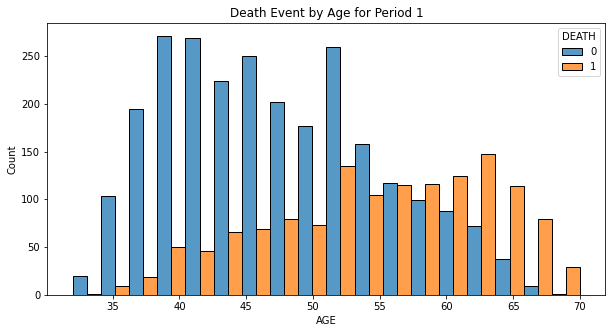

In [66]:
plt.figure(figsize = (10, 5))
plt.title('Death Event by Age for Period 1')
sns.histplot(data = framinghamP1, x = 'AGE', hue='DEATH', bins = 18, multiple= 'dodge')

<AxesSubplot:title={'center':'Death Event by Age for Period 2'}, xlabel='AGE', ylabel='Count'>

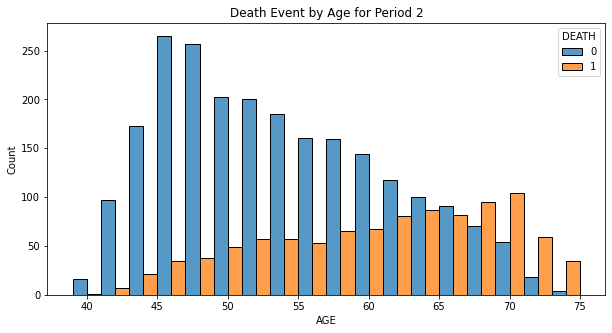

In [67]:
plt.figure(figsize = (10, 5))
plt.title('Death Event by Age for Period 2')
sns.histplot(data = framinghamP2, x = 'AGE', hue='DEATH', bins = 18, multiple= 'dodge')

<AxesSubplot:title={'center':'Death Event by Age for Period 3'}, xlabel='AGE', ylabel='Count'>

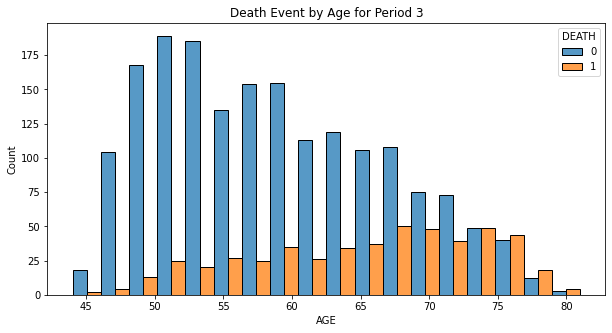

In [68]:
plt.figure(figsize = (10, 5))
plt.title('Death Event by Age for Period 3')
sns.histplot(data = framinghamP3, x = 'AGE', hue='DEATH', bins = 18, multiple= 'dodge')

<AxesSubplot:title={'center':'Coronary Heart Disease by Age'}, xlabel='AGE', ylabel='Count'>

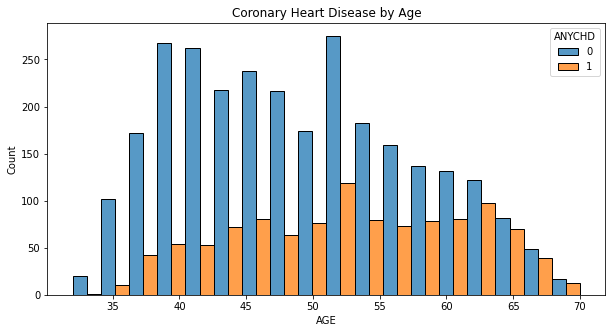

In [69]:
plt.figure(figsize = (10, 5))
plt.title('Coronary Heart Disease by Age')
sns.histplot(data = framinghamP1, x = 'AGE', hue='ANYCHD', bins = 18, multiple= 'dodge')

<AxesSubplot:title={'center':'Stroke Events by Age for Period 1'}, xlabel='AGE', ylabel='Count'>

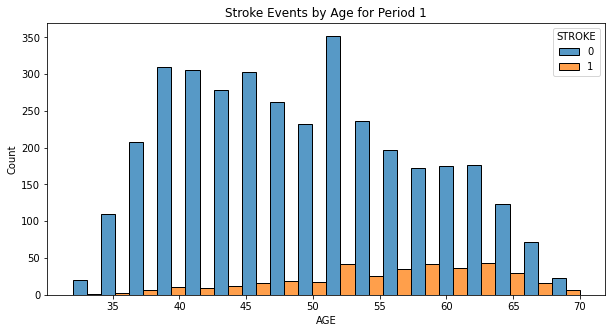

In [70]:
plt.figure(figsize = (10, 5))
plt.title('Stroke Events by Age for Period 1')
sns.histplot(data = framinghamP1, x = 'AGE', hue='STROKE', bins = 18, multiple= 'dodge')

<AxesSubplot:title={'center':'Stroke Events by Age for Period 2'}, xlabel='AGE', ylabel='Count'>

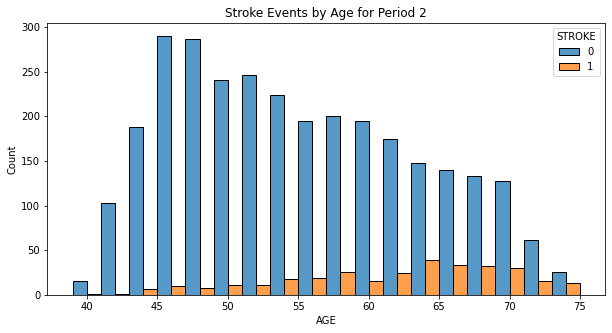

In [71]:
plt.figure(figsize = (10, 5))
plt.title('Stroke Events by Age for Period 2')
sns.histplot(data = framinghamP2, x = 'AGE', hue='STROKE', bins = 18, multiple= 'dodge')

<AxesSubplot:title={'center':'Stroke Events by Age for Period 3'}, xlabel='AGE', ylabel='Count'>

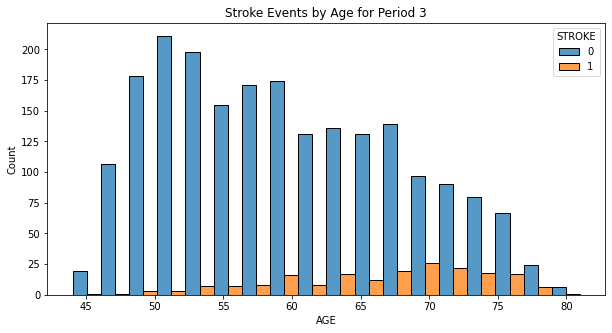

In [72]:
plt.figure(figsize = (10, 5))
plt.title('Stroke Events by Age for Period 3')
sns.histplot(data = framinghamP3, x = 'AGE', hue='STROKE', bins = 18, multiple= 'dodge')